In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -Uqq fastbook

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kornia 0.5.5 requires numpy<=1.19, but you have numpy 1.19.5 which is incompatible.
allennlp 2.5.0 requires torch<1.9.0,>=1.6.0, but you have torch 1.9.0 which is incompatible.
allennlp 2.5.0 requires torchvision<0.10.0,>=0.8.1, but you have torchvision 0.10.0 which is incompatible.


In [3]:
from fastbook import *

In [4]:
import torch
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
import pandas as pd

In [6]:
from pathlib import Path

In [7]:
path = Path('/kaggle/input/plant-pathology-2020-fgvc7/')

In [8]:
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

In [9]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [10]:
train.where(train != 1, train.columns.to_series(), axis=1).head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,scab
1,Train_1,0,multiple_diseases,0,0
2,Train_2,healthy,0,0,0
3,Train_3,0,0,rust,0
4,Train_4,healthy,0,0,0


In [11]:
train['label'] = train.set_index('image_id').idxmax(axis=1).reset_index()[0]

In [12]:
train['image_id'] = train['image_id'].astype(str) + '.jpg'

In [13]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0.jpg,0,0,0,1,scab
1,Train_1.jpg,0,1,0,0,multiple_diseases
2,Train_2.jpg,1,0,0,0,healthy
3,Train_3.jpg,0,0,1,0,rust
4,Train_4.jpg,1,0,0,0,healthy


In [14]:
plant = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2 , seed = 42),
                   get_x=ColReader(0, pref=path/'images'),
                   get_y=ColReader(5),
                   item_tfms=RandomResizedCrop(224,min_scale=0.5),
                   batch_tfms=aug_transforms())

/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


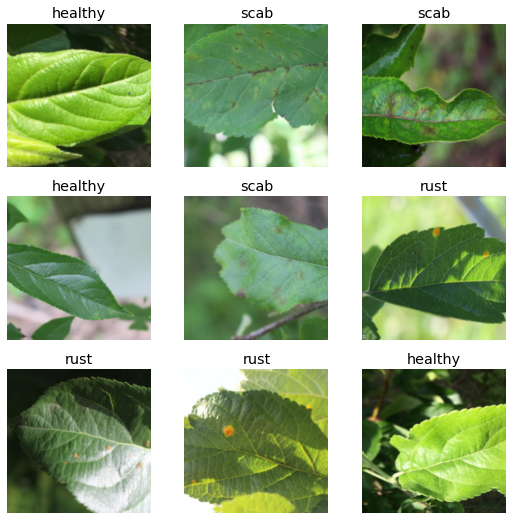

In [15]:
dls = plant.dataloaders(train)
dls.show_batch()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0010000000474974513)

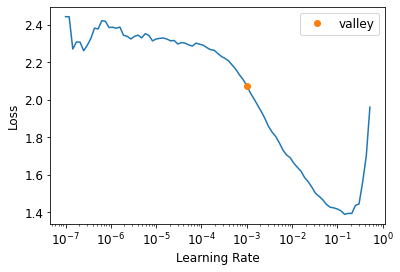

In [16]:
learn = cnn_learner(dls, resnet34 ,pretrained=True ,metrics=[error_rate, accuracy])
learn.lr_find()

In [17]:
learn.fine_tune(10, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.755019,0.564720,0.197802,0.802198,01:14


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.823229,0.488843,0.170330,0.829670,01:13
1,0.670717,0.378163,0.120879,0.879121,01:13
2,0.549578,0.295211,0.082418,0.917582,01:14
3,0.463433,0.321637,0.085165,0.914835,01:14
4,0.379464,0.320919,0.085165,0.914835,01:13
5,0.307941,0.299043,0.076923,0.923077,01:13
6,0.264770,0.299405,0.074176,0.925824,01:13
7,0.229536,0.294013,0.076923,0.923077,01:14
8,0.212655,0.288117,0.074176,0.925824,01:13
9,0.190459,0.285565,0.076923,0.923077,01:13


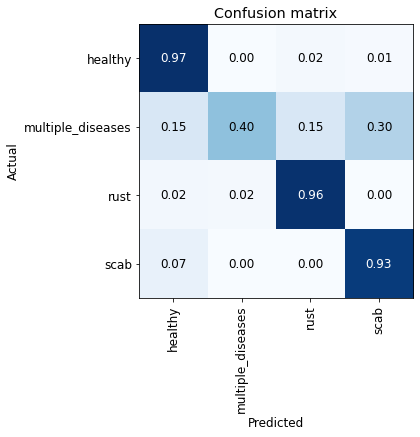

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(normalize=True, figsize=(6, 6))

In [ ]:
# learn.export()

In [1]:
1+1

2